# Tasks

- [ ] Look at training logs of each model

## Training logs

# Creating Prediction Dataset

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [ ]:
# import matplotlib
# print('matplotlib: {}'.format(matplotlib.__version__))

# from cartopy import crs as ccrs
# from cartopy import feature as cfeature

## Loading data
- Load observation set
- Load predictions Y_hat for featureless X_test i.e. test predictions

In [8]:
observations_data = np.load('./dlo3_data/Y_test.npy')
all_features_data = np.load('./pretrained_dlo3/X_test_vanilla_prediction.npy')

In [7]:
# featureless from trained_models collection
# loading in order in numpy array i.e. X_train/X_test)
no_geop_data = np.load('./trained_models/no_geop/no_geop_test_pred.npy')
no_d2m_data = np.load('./trained_models/no_d2m/no_d2m_test_pred.npy')
no_msl_data = np.load('./trained_models/no_msl/no_msl_test_pred.npy')
no_temp_data = np.load('./trained_models/no_temp/no_temp_test_pred.npy')
no_ssrd_data = np.load('./trained_models/no_ssrd/no_ssrd_test_pred.npy')
no_sst_data = np.load('./trained_models/no_sst/no_sst_test_pred.npy')

## Make Xarray Dataset
1. First convert to data arrays
2. Make into dataset use datavars

### Creating data arrays

In [11]:
# for plotting and Xarray coordinates
eralons = np.arange(-180, 0, 1.5)
eralats = np.arange(0, 72, 1.5)

time = pd.date_range('2010', '2015')
time = time[time.month.isin([6,7,8])]

dims_list = ['time', 'lat', 'lon']
coords_dict = coords = {'time' :  time,
                        'lat' : eralats,
                        'lon' : eralons}

def create_da(data):
    """ custom func, takes _data and returns xr.DataArray
    expecting shape (460, 48, 120, 1)
    """
    
    return xr.DataArray(data.squeeze(),
                        dims = dims_list,
                        coords = coords_dict)

In [19]:
# Creating data array

observations_da = create_da(observations_data)
all_features_da = create_da(all_features_data)
no_geop_da = create_da(no_geop_data)
no_d2m_da = create_da(no_d2m_data)
no_msl_da = create_da(no_msl_data)
no_temp_da = create_da(no_temp_data)
no_ssrd_da = create_da(no_ssrd_data)
no_sst_da = create_da(no_sst_data)

### Creating Dataset

In [22]:
ozone_ds = xr.Dataset(data_vars)

In [23]:
ozone_ds

<xarray.Dataset>
Dimensions:       (lat: 48, lon: 120, time: 460)
Coordinates:
  * time          (time) datetime64[ns] 2010-06-01 2010-06-02 ... 2014-08-31
  * lat           (lat) float64 0.0 1.5 3.0 4.5 6.0 ... 64.5 66.0 67.5 69.0 70.5
  * lon           (lon) float64 -180.0 -178.5 -177.0 -175.5 ... -4.5 -3.0 -1.5
Data variables:
    observation   (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    all_features  (time, lat, lon) float32 3.473 5.098 8.176 ... 17.34 5.696
    no_geop       (time, lat, lon) float32 2.079 3.837 5.716 ... 5.948 3.62
    no_d2m        (time, lat, lon) float32 0.7502 2.948 3.094 ... 5.189 1.359
    no_msl        (time, lat, lon) float32 2.559 5.499 6.836 ... 8.001 2.323
    no_temp       (time, lat, lon) float32 2.189 3.718 4.02 ... 4.23 4.831 1.47
    no_ssrd       (time, lat, lon) float32 2.268 3.915 4.244 ... 6.515 3.119
    no_sst        (time, lat, lon) float32 2.966 4.853 5.696 ... 5.453 2.901

# Load dataset and mask

In [2]:
ozone_ds = xr.load_dataset('ozone_prediction_ds.nc')

In [3]:
ozone_ds_ma = ozone_ds.where(ozone_ds.observation>0)

# Plotting

In [4]:
# lat-lon mean

X = ozone_ds_ma.observation.mean(('lat', 'lon'))

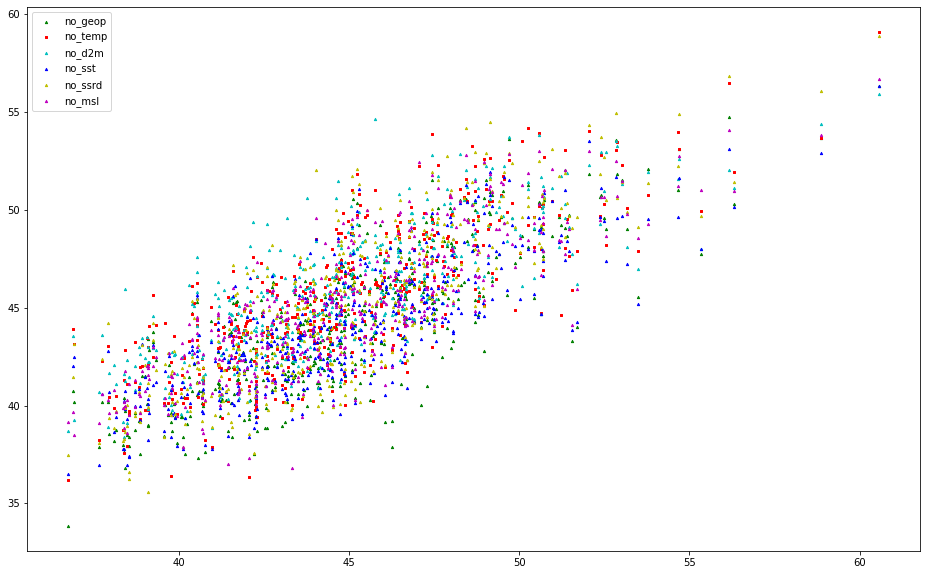

In [5]:
fig, ax = plt.subplots(figsize=(16,10))
# ax.scatter(X, ozone_ds_ma.all_features.mean(('lat', 'lon')), label = 'all', c='k', s = 5.0)
ax.scatter(X, ozone_ds_ma.no_geop.mean(('lat', 'lon')), label = 'no_geop', c='g', marker = '^', s = 5.0)
ax.scatter(X, ozone_ds_ma.no_temp.mean(('lat', 'lon')), label = 'no_temp', c='r', marker = ',', s = 5.0)
ax.scatter(X, ozone_ds_ma.no_d2m.mean(('lat', 'lon')), label = 'no_d2m', c='c', marker = '^', s = 5.0)
ax.scatter(X, ozone_ds_ma.no_sst.mean(('lat', 'lon')), label = 'no_sst', c='b', marker = '^', s = 5.0)
ax.scatter(X, ozone_ds_ma.no_ssrd.mean(('lat', 'lon')), label = 'no_ssrd', c='y', marker = '^', s = 5.0)
ax.scatter(X, ozone_ds_ma.no_msl.mean(('lat', 'lon')), label = 'no_msl', c='m', marker = '^', s = 5.0)
plt.legend()

# Plotting maps

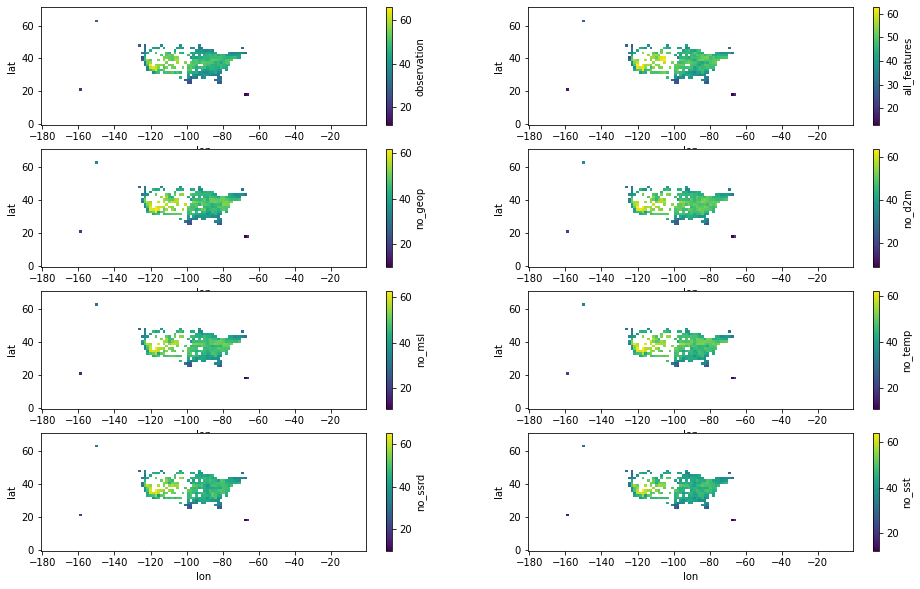

In [6]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (16,10))

for idx, var in enumerate(list(ozone_ds_ma.data_vars)):
    data = getattr(ozone_ds_ma, var)
    grid = data.mean(dim=['time'])    
    grid.plot(ax = axes.reshape(-1)[idx])

### Redoing scatter with python getattr()

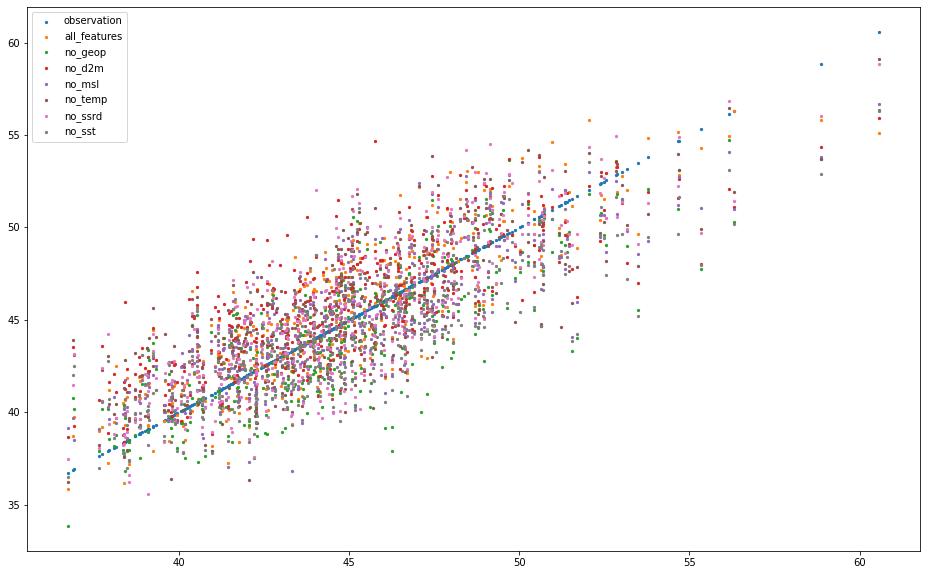

In [7]:
fig, ax = plt.subplots(figsize=(16,10))

for var in list(ozone_ds_ma.data_vars):
    data = getattr(ozone_ds_ma, var)
    grid = data.mean(dim=['lat', 'lon'])    
    ax.scatter(X, grid, label = var, s = 5.0)

plt.legend()

# Fitting

In [ ]:
# linslope

for var in list(ozone.data_vars):
    data = getattr(ozone, var)
    correlation = xs.linslope(ozone.observation, data, skipna=True)
    print(var, correlation.data)

# Checking the masking procedure

Does the number of locations change? - No

Find out by taking the difference in the number of sites in predictions and take the difference from number of sites in observations.

Easier to watch variability around ZERO.


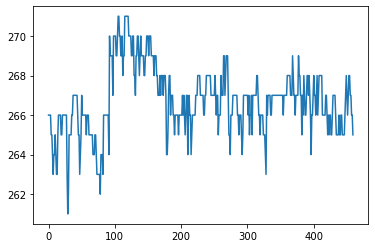

In [25]:
plt.plot(ozone_ds_ma.count(dim=['lat', 'lon']).observation)

In [30]:
number_of_sites = ozone_ds_ma.no_geop.count(dim=['lat', 'lon'])

In [40]:
list(ozone_ds_ma.data_vars)

['observation',
 'all_features',
 'no_geop',
 'no_d2m',
 'no_msl',
 'no_temp',
 'no_ssrd',
 'no_sst']

In [54]:
predictions = list(ozone_ds_ma.data_vars)
sites = np.empty((7, 460))

for idx, var in enumerate(predictions[1:]):
    data = getattr(ozone_ds_ma, var)
    number_of_sites = data.count(dim=['lat', 'lon'])
    sites[idx, :] = number_of_sites
    print(var, sites.shape)

all_features (7, 460)
no_geop (7, 460)
no_d2m (7, 460)
no_msl (7, 460)
no_temp (7, 460)
no_ssrd (7, 460)
no_sst (7, 460)


In [60]:
sites.shape

(7, 460)

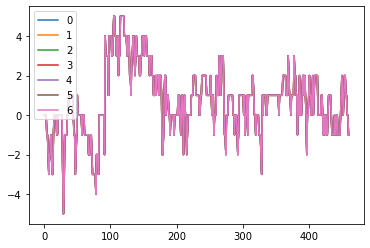

In [67]:
for i in range(7):
    plt.plot(sites[i, :] - 266, label=str(i))
    
plt.legend()